# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
print(weather_api_key)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

64dd57f82feaae3b8129b3bee0c55f07


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
        query_url = base_url+'dalvik'+"&appid="+weather_api_key
        weather_response = requests.get(query_url).json()
        weather_response

{'coord': {'lon': -18.53, 'lat': 65.97},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 280.15,
  'feels_like': 270.02,
  'temp_min': 280.15,
  'temp_max': 280.15,
  'pressure': 1011,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 12.3, 'deg': 180},
 'clouds': {'all': 75},
 'dt': 1587247614,
 'sys': {'type': 1,
  'id': 83,
  'country': 'IS',
  'sunrise': 1587187223,
  'sunset': 1587243956},
 'timezone': 0,
 'id': 2632287,
 'name': 'Dalvik',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
i=1
name = []
lng = []
lat = []
temp = []
humidity=[]
windspeed = []
clouds=[]
country = []
date = []
for city in cities:
    try:
        query_url = base_url+city+"&appid="+weather_api_key
        response = requests.get(query_url).json()
        name.append(response['name'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {i} - {city}")
        i = i+1
    except:
        print("City not found. Skipping...")
    

Processing Record 1 - nisia floresta
Processing Record 2 - avarua
City not found. Skipping...
Processing Record 3 - solano
Processing Record 4 - punta arenas
Processing Record 5 - east london
Processing Record 6 - busselton
Processing Record 7 - cayenne
Processing Record 8 - veraval
Processing Record 9 - vaini
Processing Record 10 - maniitsoq
Processing Record 11 - cherskiy
Processing Record 12 - hearst
Processing Record 13 - bluff
Processing Record 14 - puerto ayora
Processing Record 15 - katobu
Processing Record 16 - clyde river
Processing Record 17 - bambous virieux
Processing Record 18 - hovd
Processing Record 19 - rikitea
Processing Record 20 - porto novo
Processing Record 21 - dikson
Processing Record 22 - seabra
Processing Record 23 - itupiranga
Processing Record 24 - ushuaia
Processing Record 25 - hilo
Processing Record 26 - nikolskoye
Processing Record 27 - new norfolk
Processing Record 28 - laguna
Processing Record 29 - goedereede
Processing Record 30 - dunedin
Processing Rec

Processing Record 234 - luderitz
Processing Record 235 - micheweni
Processing Record 236 - eskil
Processing Record 237 - along
Processing Record 238 - palmer
Processing Record 239 - canton
Processing Record 240 - monrovia
Processing Record 241 - point pedro
Processing Record 242 - saint-pierre
City not found. Skipping...
Processing Record 243 - ayan
Processing Record 244 - rondonopolis
Processing Record 245 - roma
Processing Record 246 - san policarpo
Processing Record 247 - elk plain
Processing Record 248 - bredasdorp
Processing Record 249 - kindu
Processing Record 250 - cuenca
Processing Record 251 - tuatapere
Processing Record 252 - nuuk
Processing Record 253 - kungurtug
Processing Record 254 - gazojak
Processing Record 255 - hakkari
City not found. Skipping...
Processing Record 256 - baranchinskiy
Processing Record 257 - port macquarie
Processing Record 258 - portel
Processing Record 259 - nabire
Processing Record 260 - la romana
Processing Record 261 - cap-aux-meules
Processing Re

Processing Record 470 - darhan
Processing Record 471 - bambamarca
Processing Record 472 - ishigaki
Processing Record 473 - asyut
Processing Record 474 - santa cruz
Processing Record 475 - nagpur
Processing Record 476 - peterhead
Processing Record 477 - zhezkazgan
Processing Record 478 - batemans bay
Processing Record 479 - quixeramobim
Processing Record 480 - kholtoson
Processing Record 481 - ossora
Processing Record 482 - novoagansk
Processing Record 483 - trelew
Processing Record 484 - kahului
Processing Record 485 - bethal
Processing Record 486 - hadejia
Processing Record 487 - linqu
Processing Record 488 - husavik
Processing Record 489 - mosquera
Processing Record 490 - burgeo
Processing Record 491 - finschhafen
Processing Record 492 - kudahuvadhoo
Processing Record 493 - shingu
Processing Record 494 - kananga
Processing Record 495 - quincy
Processing Record 496 - yabelo
Processing Record 497 - pizarro
Processing Record 498 - fare
Processing Record 499 - richards bay
City not found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data_df = pd.DataFrame({'City':name,
           'Longitude':lng, 
           'Latitude': lat,
           'Temperature':temp, 
           'Humidity': humidity,
           'Wind Speed': windspeed,
           'Cloud Cover %':clouds,
           'Country': country,
            'Date':date})
data_df

,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloud Cover %,Country,Date
0,Nísia Floresta,-35.21,-6.09,301.15,78,2.10,40,BR,1587247614
1,Avarua,-159.78,-21.21,300.15,74,3.10,54,CK,1587247384
2,Solano,-121.95,38.23,294.26,45,7.70,1,US,1587247616
3,Punta Arenas,-70.92,-53.15,285.15,46,8.70,40,CL,1587247616
4,East London,27.91,-33.02,294.94,66,7.84,0,ZA,1587247616
...,...,...,...,...,...,...,...,...,...
551,Saa,11.45,4.37,295.78,81,1.79,100,CM,1587247698
552,Honningsvåg,25.97,70.98,276.44,84,2.30,100,NO,1587247698
553,Sartell,-94.21,45.62,289.15,36,6.70,90,US,1587247585
554,Taoudenni,-3.98,22.68,300.61,43,11.03,14,ML,1587247698


In [6]:
data_df['Temperature'] = (((data_df['Temperature']-273.15)*1.8)+32)
data_df.head(20)

,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloud Cover %,Country,Date
0,Nísia Floresta,-35.21,-6.09,82.400,78,2.10,40,BR,1587247614
1,Avarua,-159.78,-21.21,80.600,74,3.10,54,CK,1587247384
2,Solano,-121.95,38.23,69.998,45,7.70,1,US,1587247616
3,Punta Arenas,-70.92,-53.15,53.600,46,8.70,40,CL,1587247616
4,East London,27.91,-33.02,71.222,66,7.84,0,ZA,1587247616
5,Busselton,115.33,-33.65,64.004,69,11.14,100,AU,1587247504
6,Cayenne,-52.33,4.93,82.400,78,3.10,40,GF,1587247382
7,Verāval,70.37,20.90,80.708,57,5.07,12,IN,1587247617
8,Vaini,-175.20,-21.20,78.800,78,5.10,75,TO,1587247617
9,Maniitsoq,-52.90,65.42,26.780,92,7.98,100,GL,1587247618


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humhundred_df = data_df[data_df['Humidity']>100]
humhundred_df

,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloud Cover %,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
data_df.to_csv("../output_data/cities.csv" , index = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature')

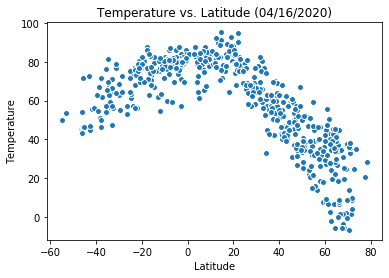

In [11]:
plt.scatter( data_df['Latitude'],data_df['Temperature'],edgecolor='white')
plt.title('Temperature vs. Latitude (04/16/2020)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')



## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

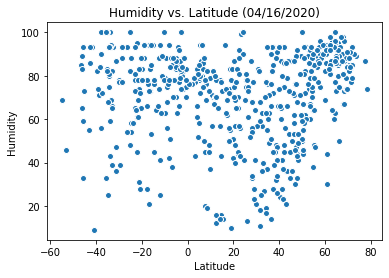

In [12]:
plt.scatter(data_df['Latitude'], data_df['Humidity'], edgecolor='white')
plt.title('Humidity vs. Latitude (04/16/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloud Cover (%)')

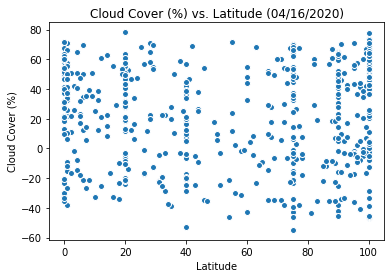

In [43]:
plt.scatter(data_df['Cloud Cover %'], data_df['Latitude'],edgecolor='white')
plt.title('Cloud Cover (%) vs. Latitude (04/16/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

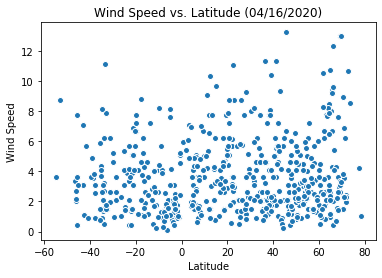

In [14]:
plt.scatter(data_df['Latitude'], data_df['Wind Speed'], edgecolor='white')
plt.title('Wind Speed vs. Latitude (04/16/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
def Linregress():
    slope, intercept, r, p, std_err = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0, 1), xytext=(12, -12), va='top',
             xycoords ='axes fraction', textcoords='offset points',fontsize=15, color="red")

In [22]:
# Create Northern and Southern Hemisphere DataFrames
north_df = data_df[data_df['Latitude']>=0]
south_df = data_df[data_df['Latitude']<0]
south_df

,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloud Cover %,Country,Date
0,Nísia Floresta,-35.21,-6.09,82.400,78,2.10,40,BR,1587247614
1,Avarua,-159.78,-21.21,80.600,74,3.10,54,CK,1587247384
3,Punta Arenas,-70.92,-53.15,53.600,46,8.70,40,CL,1587247616
4,East London,27.91,-33.02,71.222,66,7.84,0,ZA,1587247616
5,Busselton,115.33,-33.65,64.004,69,11.14,100,AU,1587247504
...,...,...,...,...,...,...,...,...,...
533,Buala,159.59,-8.14,81.122,78,0.30,86,SB,1587247696
539,Angoche,39.91,-16.23,77.378,85,3.33,2,MZ,1587247697
540,Pangoa,-73.00,-12.12,82.112,41,1.70,1,PE,1587247697
542,Victor Harbor,138.62,-35.57,53.996,100,1.49,47,AU,1587247697


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Maximum Temperature')

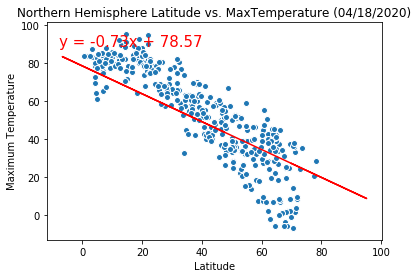

In [42]:
x_values=north_df['Temperature']
y_values= north_df['Latitude']
Linregress()
Max_temp_chart = plt.scatter(north_df['Latitude'],north_df['Temperature'], edgecolor='white')
plt.title('Northern Hemisphere Latitude vs. MaxTemperature (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

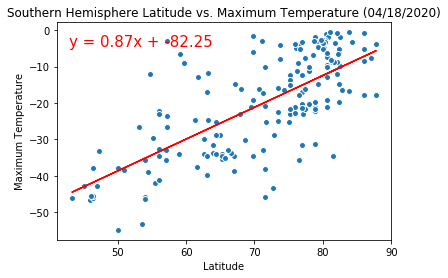

In [46]:
Max_temp_chart = plt.scatter(south_df['Temperature'],south_df['Latitude'], edgecolor='white')
plt.title('Southern Hemisphere Latitude vs. Maximum Temperature (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
x_values=south_df['Temperature']
y_values= south_df['Latitude']
Linregress()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

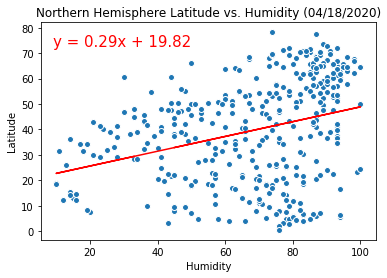

In [36]:
north_humidity_chart = plt.scatter(north_df['Humidity'], north_df['Latitude'], edgecolor='white')
plt.title('Northern Hemisphere Latitude vs. Humidity (04/18/2020)')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
x_values=north_df['Humidity']
y_values= north_df['Latitude']
Linregress()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

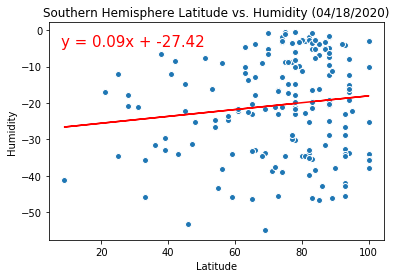

In [30]:
south_humidity_chart = plt.scatter(south_df['Humidity'], south_df['Latitude'], edgecolor='white')
plt.title('Southern Hemisphere Latitude vs. Humidity (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
x_values=south_df['Humidity']
y_values= south_df['Latitude']
Linregress()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

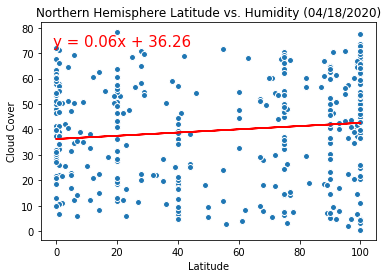

In [31]:
north_cloud_chart = plt.scatter(north_df['Cloud Cover %'], north_df['Latitude'], edgecolor='white')
plt.title('Northern Hemisphere Latitude vs. Humidity (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
x_values=north_df['Cloud Cover %']
y_values= north_df['Latitude']
Linregress()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

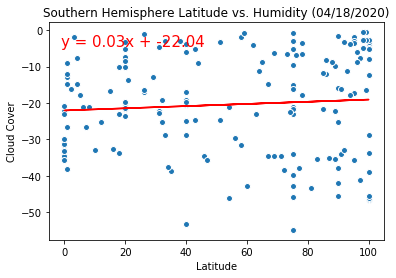

In [32]:
cloud_chart = plt.scatter(south_df['Cloud Cover %'], south_df['Latitude'], edgecolor='white')
plt.title('Southern Hemisphere Latitude vs. Humidity (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
x_values=south_df['Cloud Cover %']
y_values= south_df['Latitude']
Linregress()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

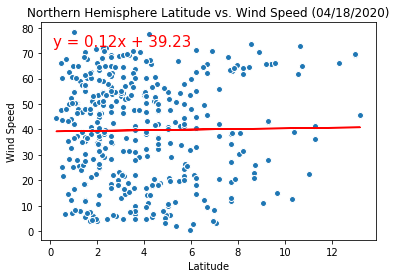

In [33]:
north_wind_df = plt.scatter(north_df['Wind Speed'], north_df['Latitude'], edgecolor='white')
plt.title('Northern Hemisphere Latitude vs. Wind Speed (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
x_values=north_df['Wind Speed']
y_values= north_df['Latitude']
Linregress()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

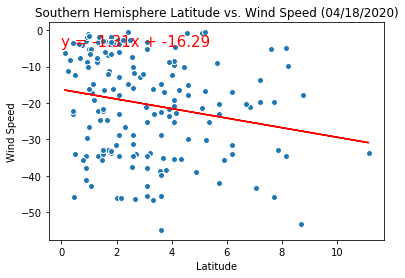

In [34]:
south_wind_chart = plt.scatter(south_df['Wind Speed'], south_df['Latitude'], edgecolor='white')
plt.title('Southern Hemisphere Latitude vs. Wind Speed (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
x_values=south_df['Wind Speed']
y_values= south_df['Latitude']
Linregress()

In [40]:
#From investigating our data and the trends noticed we can see a general increase in temperature as we approach the equator, 
#but the heat is more pronounced in the northern hemisphere. 
#This could indicate the increasing temperatures as the north approaches the summer months.

In [41]:
#we can also see that much cloud data congregates around specific points, which may be a factor of the way cloud data is reported. 
#A similar trend (resulting in numerous vertical groupings) can be observed in temperature reporting.
#Humidity in the Northern hemisphere also trends upward with latitude.